In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_frame = pd.read_csv('./Customers.csv')

nulls = pd.DataFrame(data_frame.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)
print("\n")

                        Null Count
Feature                           
Spending Score (1-100)           0
Annual Income (k$)               0
Age                              0
Gender                           0
CustomerID                       0




269981.28
181363.59595959596
106348.37306211118
73679.78903948834
44448.45544793371
37239.83554245604
30273.394312070042
25018.576334776335
21850.165282585633
19664.685196005543


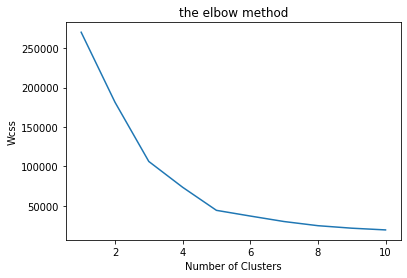

In [2]:
x = data_frame.iloc[:, [3,4]].values
y = data_frame.iloc[:-1]
wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(x)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [3]:
k = KMeans(5)
k.fit(x)
preditction = k.predict(x)
score = metrics.silhouette_score(x, preditction)
print(score)

0.553931997444648


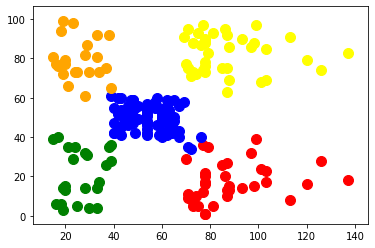

In [18]:

plt.scatter(x[preditction == 0, 0], x[preditction == 0, 1], s = 100, c = 'red')
plt.scatter(x[preditction == 1, 0], x[preditction == 1, 1], s = 100, c = 'blue')
plt.scatter(x[preditction == 2, 0], x[preditction == 2, 1], s = 100, c = 'green')
plt.scatter(x[preditction == 3, 0], x[preditction == 3, 1], s = 100, c = 'yellow')
plt.scatter(x[preditction == 4, 0], x[preditction == 4, 1], s = 100, c = 'orange')
